## References

https://gist.github.com/n1try/af0b8476ae4106ec098fea1dfe57f578,
https://medium.com/@tuzzer/cart-pole-balancing-with-q-learning-b54c6068d947 and
http://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs440/notebooks/15%20Reinforcement%20Learning%20for%20Two-Player%20Games.ipynb

## Import Libraries

In [5]:
import numpy as np
import math
import gym
from collections import deque
import matplotlib.pyplot as plt

## Functions

In [6]:
import random
def winnerState(meanScore,iteration):
    '''Check whether the mean score for last 100 iterations
    is greater than or equal to 195 time steps. 
    If it is, winning state that is the cart pole 
    is held upright for more than 200 time steps', is reached.'''
    if meanScore >= 195 and iteration >= 100:
        return 1
    else:
        return 0

def epsilonGreedy(epsilon, Q, state):    
    '''Returns random move or greedy move based on epsilon value.
    At the beginning, random actions are chosen as the agent has not learnt 
    the best moves to keep the cart-pole upright. Once it is trained, actions 
    with highest rewards are considered.'''
    if (np.random.random() <= epsilon):
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state])
    return action

def discrete(observ):
    '''Returns discrete space representation for our continuous input features'''
    lowerBound = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -math.radians(50)]
    upperBound = [env.observation_space.high[0], 0.5, env.observation_space.high[2], math.radians(50)]
    ratios = [(observ[i] + abs(lowerBound[i])) / (upperBound[i] - lowerBound[i]) for i in range(len(observ))]
    newObserv = [int(round((buckets[i] - 1) * ratios[i])) for i in range(len(observ))]
    newObserv = [min(buckets[i] - 1, max(0, newObserv[i])) for i in range(len(observ))]
    return tuple(newObserv)

def trainQ(nRepetitions, learningRate, explorationRate, decayFactor):
    scores = deque(maxlen=100)
    adaDivisor=25
    quiet=False
    Q = np.zeros(buckets + (env.action_space.n,))
    scorePlot=[]
    runs=[]
    for i in range(nRepetitions):
        state = discrete(env.reset())
        # Get adaptive learning and exploration rate
        alpha = max(learningRate, min(1.0, 1.0 - math.log10((i + 1) / adaDivisor)))
        epsilon = max(explorationRate, min(1, 1.0 - math.log10((i + 1) / adaDivisor)))
        maxMoves=10000
        done= False
        score=0
        while not done:
            move = epsilonGreedy(epsilon, Q, state)
            observation,rewards,done,_=env.step(move)
            new_state = discrete(observation)
            # Update Q
            Q[state][move] += alpha * (rewards + decayFactor * np.max(Q[new_state]) - Q[state][move])
            state=new_state
            score+=1
        runs.append(i)
        scores.append(score)
        scorePlot.append(score)
        meanScore = np.mean(scores)
        if winnerState(meanScore,i):
            print('Ran {} iterations. Trained after {} trials ✔'.format(i, i - 100))
            plt.plot(runs,scorePlot)
            plt.title('Training Plot-Scores over episodes')
            plt.xlabel('Episodes')
            plt.ylabel('Scores')
            plt.show()
            return Q
        if i % 100 == 0 and not quiet: 
                print('[Iteration {}] - Mean survival time was {} ticks.'.format(i, meanScore))
    if not quiet: 
        print('Did not solve after {} iterations'.format(i))
        return i

def testQ(Q):    
    scores = deque(maxlen=100)
    memory = deque(maxlen=100000)
    nWinTicks=195
    epsilon=0
    run=[]
    # Loop for 10 random start positions to reach goal
    for i in range(0,10):
        run.append(i)
        state = discrete(env.reset())
        maxMoves=10000
        done= False
        score=0
        while not done:
            move = epsilonGreedy(epsilon, Q, state)
            observation,rewards,done,_=env.step(move)
            new_state = discrete(observation)
            state=new_state
            score+=1
        scores.append(score)
        meanScore = np.mean(scores)
        if meanScore >= nWinTicks:
            print('Mean Survival Time for ',i+1,' iteration is ',meanScore,' ticks.')
    plt.plot(run,scores)
    plt.title('Testing Plot-Scores over episodes')
    plt.xlabel('Episodes')
    plt.ylabel('Scores')
    plt.show()

## Initialize Parameters

In [4]:
learningRate=0.1                   # determines learning by agent in each iteration
explorationRate=0.1                # prevents algorithm from getting stuck in local minima
decayFactor=1                      # penalizes the agent if it takes long 
nRepetitions=1000                  # Number of Repitions 
env=gym.make('CartPole-v0')        # Open AI cart pole environment
#env = gym.wrappers.Monitor(env, '/tmp/cartpole', force=True)    #For simulation of inverted pendulum
buckets=(1,1,6,12)    

## Function Call

[Iteration 0] - Mean survival time was 13.0 ticks.
[Iteration 100] - Mean survival time was 31.09 ticks.
[Iteration 200] - Mean survival time was 121.55 ticks.
Ran 274 iterations. Trained after 174 trials ✔


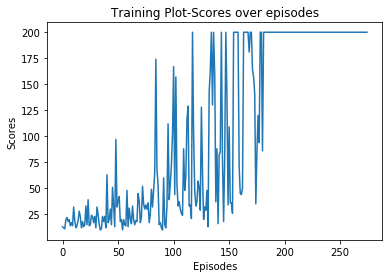

Mean Survival Time for  1  iteration is  200.0  ticks.
Mean Survival Time for  2  iteration is  200.0  ticks.
Mean Survival Time for  3  iteration is  200.0  ticks.
Mean Survival Time for  4  iteration is  200.0  ticks.
Mean Survival Time for  5  iteration is  200.0  ticks.
Mean Survival Time for  6  iteration is  200.0  ticks.
Mean Survival Time for  7  iteration is  200.0  ticks.
Mean Survival Time for  8  iteration is  200.0  ticks.
Mean Survival Time for  9  iteration is  200.0  ticks.
Mean Survival Time for  10  iteration is  200.0  ticks.


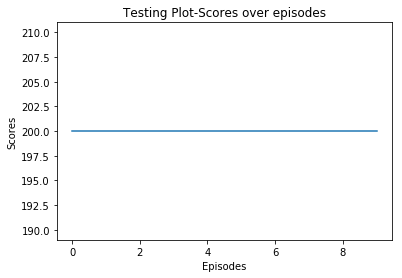

In [5]:
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)
testQ(Q)

## Learning Rate = 0.01, Exploration Rate=0.1

[Iteration 0] - Mean survival time was 13.0 ticks.
[Iteration 100] - Mean survival time was 37.3 ticks.
[Iteration 200] - Mean survival time was 134.55 ticks.
Ran 259 iterations. Trained after 159 trials ✔


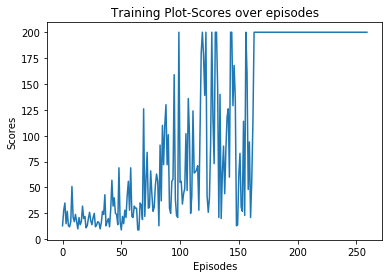

Mean Survival Time for  1  iteration is  200.0  ticks.
Mean Survival Time for  2  iteration is  200.0  ticks.
Mean Survival Time for  3  iteration is  200.0  ticks.
Mean Survival Time for  4  iteration is  200.0  ticks.
Mean Survival Time for  5  iteration is  200.0  ticks.
Mean Survival Time for  6  iteration is  200.0  ticks.
Mean Survival Time for  7  iteration is  200.0  ticks.
Mean Survival Time for  8  iteration is  200.0  ticks.
Mean Survival Time for  9  iteration is  200.0  ticks.
Mean Survival Time for  10  iteration is  200.0  ticks.


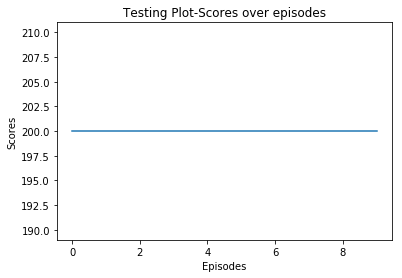

In [6]:
learningRate=0.01
explorationRate=0.1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)
if Q is not None:
    testQ(Q)

## Learning Rate = 0.001, Exploration Rate=0.1

[Iteration 0] - Mean survival time was 13.0 ticks.
[Iteration 100] - Mean survival time was 39.67 ticks.
[Iteration 200] - Mean survival time was 147.96 ticks.
Ran 254 iterations. Trained after 154 trials ✔


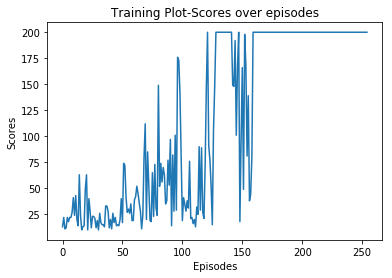

Mean Survival Time for  1  iteration is  200.0  ticks.
Mean Survival Time for  2  iteration is  200.0  ticks.
Mean Survival Time for  3  iteration is  200.0  ticks.
Mean Survival Time for  4  iteration is  200.0  ticks.
Mean Survival Time for  5  iteration is  200.0  ticks.
Mean Survival Time for  6  iteration is  200.0  ticks.
Mean Survival Time for  7  iteration is  200.0  ticks.
Mean Survival Time for  8  iteration is  200.0  ticks.
Mean Survival Time for  9  iteration is  200.0  ticks.
Mean Survival Time for  10  iteration is  200.0  ticks.


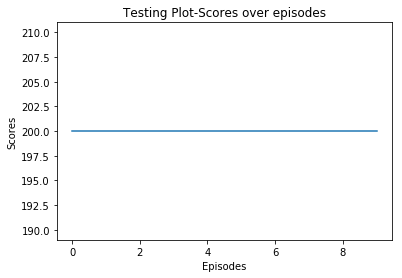

In [7]:
learningRate=0.001
explorationRate=0.1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)
if Q is not None:
    testQ(Q)

## Learning Rate = 0.00001, Exploration Rate=0.1

[Iteration 0] - Mean survival time was 15.0 ticks.
[Iteration 100] - Mean survival time was 31.53 ticks.
[Iteration 200] - Mean survival time was 157.98 ticks.
Ran 250 iterations. Trained after 150 trials ✔


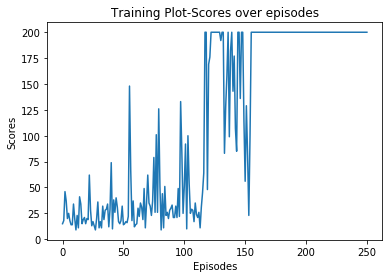

Mean Survival Time for  1  iteration is  200.0  ticks.
Mean Survival Time for  2  iteration is  200.0  ticks.
Mean Survival Time for  3  iteration is  200.0  ticks.
Mean Survival Time for  4  iteration is  200.0  ticks.
Mean Survival Time for  5  iteration is  200.0  ticks.
Mean Survival Time for  6  iteration is  200.0  ticks.
Mean Survival Time for  7  iteration is  200.0  ticks.
Mean Survival Time for  8  iteration is  200.0  ticks.
Mean Survival Time for  9  iteration is  200.0  ticks.
Mean Survival Time for  10  iteration is  200.0  ticks.


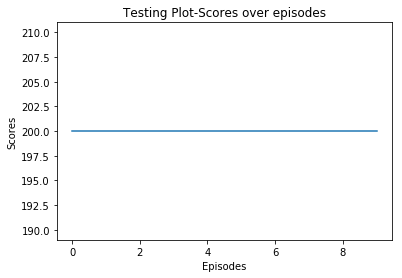

In [8]:
learningRate=0.00001
explorationRate=0.1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)
if Q is not None:
    testQ(Q)

## Learning Rate = 0.2, Exploration Rate=0.1

[Iteration 0] - Mean survival time was 32.0 ticks.
[Iteration 100] - Mean survival time was 38.27 ticks.
[Iteration 200] - Mean survival time was 136.9 ticks.
Ran 244 iterations. Trained after 144 trials ✔


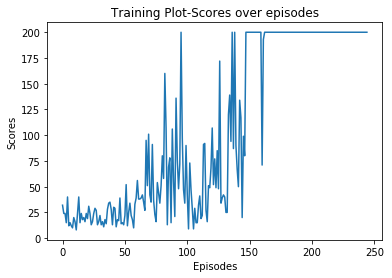

In [9]:
learningRate=0.2
explorationRate=0.1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)

Mean Survival Time for  1  iteration is  200.0  ticks.
Mean Survival Time for  2  iteration is  200.0  ticks.
Mean Survival Time for  3  iteration is  200.0  ticks.
Mean Survival Time for  4  iteration is  200.0  ticks.
Mean Survival Time for  5  iteration is  200.0  ticks.
Mean Survival Time for  6  iteration is  200.0  ticks.
Mean Survival Time for  7  iteration is  200.0  ticks.
Mean Survival Time for  8  iteration is  200.0  ticks.
Mean Survival Time for  9  iteration is  200.0  ticks.
Mean Survival Time for  10  iteration is  200.0  ticks.


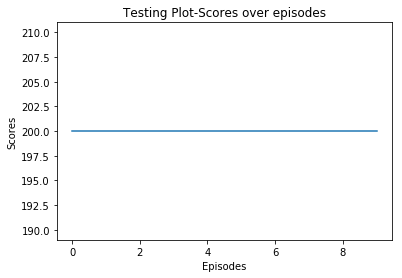

In [10]:
testQ(Q)

## Learning Rate = 0.5, Exploration Rate=0.1

In [11]:
learningRate=0.5
explorationRate=0.1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)

[Iteration 0] - Mean survival time was 10.0 ticks.
[Iteration 100] - Mean survival time was 29.38 ticks.
[Iteration 200] - Mean survival time was 95.2 ticks.
[Iteration 300] - Mean survival time was 151.79 ticks.
[Iteration 400] - Mean survival time was 156.5 ticks.
[Iteration 500] - Mean survival time was 162.25 ticks.
[Iteration 600] - Mean survival time was 168.89 ticks.
[Iteration 700] - Mean survival time was 174.56 ticks.
[Iteration 800] - Mean survival time was 156.76 ticks.
[Iteration 900] - Mean survival time was 161.32 ticks.
Did not solve after 999 iterations


## Learning Rate = 1, Exploration Rate=0.1

In [12]:
learningRate=1
explorationRate=0.1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)

[Iteration 0] - Mean survival time was 19.0 ticks.
[Iteration 100] - Mean survival time was 24.36 ticks.
[Iteration 200] - Mean survival time was 47.63 ticks.
[Iteration 300] - Mean survival time was 64.68 ticks.
[Iteration 400] - Mean survival time was 50.42 ticks.
[Iteration 500] - Mean survival time was 40.59 ticks.
[Iteration 600] - Mean survival time was 51.94 ticks.
[Iteration 700] - Mean survival time was 38.57 ticks.
[Iteration 800] - Mean survival time was 64.06 ticks.
[Iteration 900] - Mean survival time was 50.28 ticks.
Did not solve after 999 iterations


## Learning Rate = 5, Exploration Rate=0.1

In [13]:
learningRate=5
explorationRate=0.1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)

[Iteration 0] - Mean survival time was 13.0 ticks.
[Iteration 100] - Mean survival time was 20.52 ticks.
[Iteration 200] - Mean survival time was 17.96 ticks.
[Iteration 300] - Mean survival time was 12.95 ticks.
[Iteration 400] - Mean survival time was 12.85 ticks.
[Iteration 500] - Mean survival time was 11.67 ticks.


C:\Users\NAMITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
C:\Users\NAMITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


[Iteration 600] - Mean survival time was 22.15 ticks.
[Iteration 700] - Mean survival time was 10.16 ticks.
[Iteration 800] - Mean survival time was 9.84 ticks.
[Iteration 900] - Mean survival time was 10.01 ticks.
Did not solve after 999 iterations


## Learning Rate = 5, Exploration Rate=0.001

In [14]:
learningRate=5
explorationRate=0.001
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)

[Iteration 0] - Mean survival time was 17.0 ticks.
[Iteration 100] - Mean survival time was 22.17 ticks.
[Iteration 200] - Mean survival time was 16.67 ticks.
[Iteration 300] - Mean survival time was 12.61 ticks.
[Iteration 400] - Mean survival time was 12.86 ticks.
[Iteration 500] - Mean survival time was 16.5 ticks.


C:\Users\NAMITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: overflow encountered in double_scalars
C:\Users\NAMITA\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in double_scalars


[Iteration 600] - Mean survival time was 23.56 ticks.
[Iteration 700] - Mean survival time was 22.68 ticks.
[Iteration 800] - Mean survival time was 23.08 ticks.
[Iteration 900] - Mean survival time was 21.71 ticks.
Did not solve after 999 iterations


## Learning Rate = 0.2, Exploration Rate=0.001

[Iteration 0] - Mean survival time was 23.0 ticks.
[Iteration 100] - Mean survival time was 37.65 ticks.
[Iteration 200] - Mean survival time was 109.81 ticks.
Ran 299 iterations. Trained after 199 trials ✔


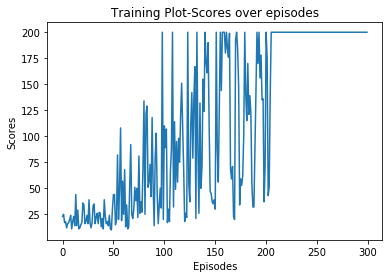

In [17]:
learningRate=0.2
explorationRate=0.001
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)

## Learning Rate = 0.2, Exploration Rate=1

In [16]:
learningRate=0.2
explorationRate=1
decayFactor=1
nRepetitions=1000
env=gym.make('CartPole-v0')
buckets=(1,1,6,12)
Q=trainQ(nRepetitions, learningRate, explorationRate, decayFactor)

[Iteration 0] - Mean survival time was 38.0 ticks.
[Iteration 100] - Mean survival time was 23.04 ticks.
[Iteration 200] - Mean survival time was 23.01 ticks.
[Iteration 300] - Mean survival time was 22.89 ticks.
[Iteration 400] - Mean survival time was 21.21 ticks.
[Iteration 500] - Mean survival time was 22.96 ticks.
[Iteration 600] - Mean survival time was 21.7 ticks.
[Iteration 700] - Mean survival time was 23.26 ticks.
[Iteration 800] - Mean survival time was 21.26 ticks.
[Iteration 900] - Mean survival time was 24.35 ticks.
Did not solve after 999 iterations


## Observations:

Below is the table for the above results:
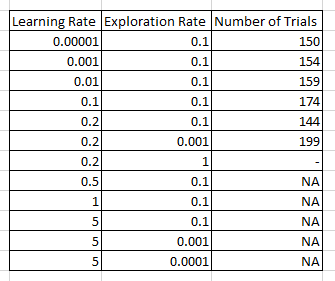

It can be concluded that the agent is able balance the pendulum for lower values of learning rate and goal is not reached for greater values of learning rate with a constant exploration rate of 0.1. Similarly, For a constant learning rate of 0.2, number of trials increases as the exploration rate decreases and goal is not reached for higher values.